In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Gather Data

In [3]:
#load train and test data
train_df=pd.read_csv('house-prices-train-data.csv')
test_df=pd.read_csv('house-prices-test-data.csv')
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Assess Data

In [5]:
train_df.shape

(1460, 81)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
train_df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
890,891,50,RL,60.0,8064,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,2000,7,2007,WD,Normal,122900
861,862,190,RL,75.0,11625,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,131500
875,876,60,FV,75.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,New,Partial,303477
132,133,20,RL,75.0,7388,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,150750
109,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000


In [8]:
#drop columns Alley, FireplaceQu, PoolQC, Fence, MiscFeature as they have high % of missing data
train_df=train_df.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1)

In [9]:
#drop columns Alley, FireplaceQu, PoolQC, Fence, MiscFeature from test data
test_df=test_df.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1)

In [10]:
#drop row with null value for Electrical column
train_df=train_df.dropna(subset=['Electrical'], axis=0)
train_df.Electrical.isnull().sum()

0

There are 11 columns about basement features and they have missing data. The relation ship between SalePriceand Basement features is explored further. The missing values will be replaced by "No Basement" as that is what the missing data signifies. Next faceting is used to visualize the relationship between SalePrice and BsmtQual,BsmtCond.
Also the relationship between TotalBsmtSF and SalePrice is analysed so that we get a better idea about the feature importance of the 11 columns.

In [11]:
train_df.BsmtQual.value_counts()

TA    649
Gd    617
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [12]:
#replace null values with "No Basement" in BsmtQual
train_df['BsmtQual'].fillna("No Basement", inplace=True)

In [13]:
train_df.BsmtQual.isnull().sum()

0

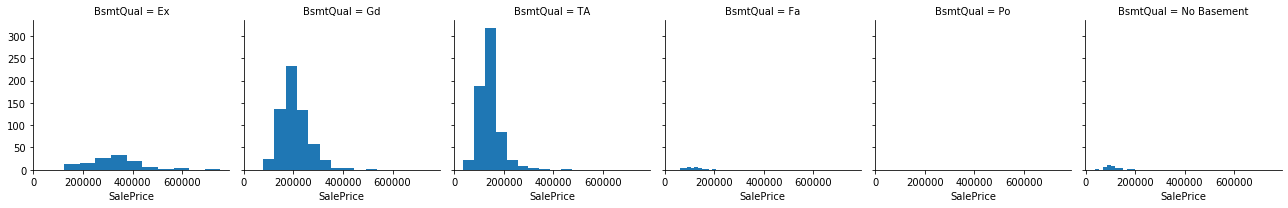

In [14]:
# Convert the "BsmtQual" column from a plain object type into an ordered categorical type
basement_classes = ['Ex','Gd','TA','Fa','Po','No Basement']
bclasses = pd.api.types.CategoricalDtype(ordered=True, categories=basement_classes)
train_df['BsmtQual'] = train_df['BsmtQual'].astype(bclasses);

# Plot the Seaborn's FacetGrid
g = sns.FacetGrid(data = train_df, col = 'BsmtQual')
g.map(plt.hist, "SalePrice")

In [15]:
train_df.BsmtQual.value_counts()

TA             649
Gd             617
Ex             121
No Basement     37
Fa              35
Po               0
Name: BsmtQual, dtype: int64

In [16]:
#replace null values with "No Basement"
train_df['BsmtCond'].fillna("No Basement", inplace=True)

In [17]:
train_df.BsmtCond.value_counts()

TA             1310
Gd               65
Fa               45
No Basement      37
Po                2
Name: BsmtCond, dtype: int64

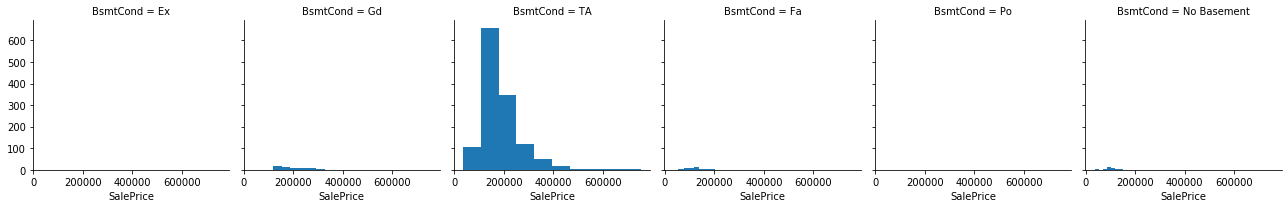

In [18]:
# Convert the "BsmtQual" column from a plain object type into an ordered categorical type
base_cond_classes = ['Ex','Gd','TA','Fa','Po','No Basement']
bclasses = pd.api.types.CategoricalDtype(ordered=True, categories=base_cond_classes)
train_df['BsmtCond'] = train_df['BsmtCond'].astype(bclasses);

# Plot the Seaborn's FacetGrid
g = sns.FacetGrid(data = train_df, col = 'BsmtCond')
g.map(plt.hist, "SalePrice")

Text(0, 0.5, 'Sale Price')

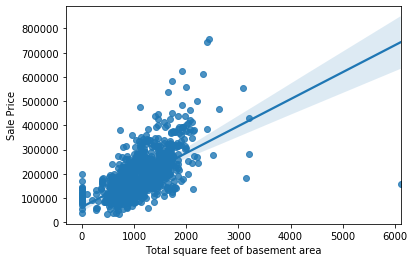

In [19]:
# Plot TotalBsmtSF v/s Sales Price regplot
sns.regplot(data = train_df, x = 'TotalBsmtSF', y = 'SalePrice');
plt.xlabel('Total square feet of basement area')
plt.ylabel('Sale Price')

The impact of Basement features on Sale Price is not very huge so I have removed columns BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, BsmtFullBath, BsmtHalfBath

In [20]:
# drop columns BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, BsmtFullBath, BsmtHalfBath
train_df=train_df.drop(['BsmtExposure','BsmtFinType1', 'BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','BsmtFullBath','BsmtHalfBath'], axis=1)
train_df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500


In [21]:
#make changes in test data
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [22]:
#fill null values for BsmtQual and BsmtCond
test_df['BsmtQual'].fillna("No Basement", inplace=True)
test_df['BsmtCond'].fillna("No Basement", inplace=True)

#drop row with missing value for TotalBsmtSF
test_df=test_df.dropna(subset=['TotalBsmtSF'], axis=0)

# drop extra Basement features
test_df=test_df.drop(['BsmtExposure','BsmtFinType1', 'BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','BsmtFullBath','BsmtHalfBath'], axis=1)
test_df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal


In [23]:
# LotFrontage is linear feet of street connected to property we can assume that null values is for property which 
#is not connected to street, hence filling null with 0
train_df['LotFrontage'].fillna(0, inplace=True)

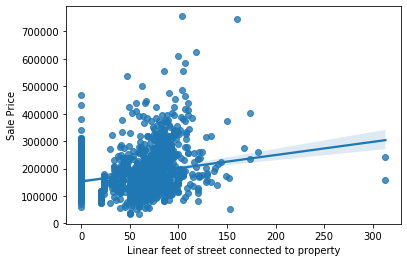

In [24]:
# Plot LotFrontage v/s Sales Price regplot
sns.regplot(data = train_df, x = 'LotFrontage', y = 'SalePrice');
plt.xlabel('Linear feet of street connected to property')
plt.ylabel('Sale Price');

In [25]:
test_df['LotFrontage'].fillna(0, inplace=True)

In [26]:
# assess MasVnrType column
train_df.MasVnrType.value_counts()

None       863
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [27]:
#As MasVnrType has None option we will drop rows with null values as they point to missing data
train_df=train_df.dropna(subset=['MasVnrType'], axis=0)
test_df=test_df.dropna(subset=['MasVnrType'], axis=0)

In [28]:
#from data_description we know that missing data in Garage columns represent no garage
train_df[['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']]=train_df[['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']].fillna('No Garage')

In [29]:
# clean test_data for garage features GarageCars
test_df=test_df.dropna(subset=['GarageCars'], axis=0)

In [30]:
test_df['GarageType'].fillna('No Garage', inplace=True)

In [31]:

df= test_df.query('GarageType in ["2Types","Attchd","Basment","BuiltIn","CarPort","Detchd"] and GarageFinish.isnull()', engine='python')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
666,2127,60,RM,57.0,8094,Pave,Reg,Lvl,AllPub,Inside,...,0,180,0,0,0,1000,9,2008,WD,Normal


In [32]:
test_df.drop(666, inplace=True)

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1451 non-null   int64   
 1   MSSubClass     1451 non-null   int64   
 2   MSZoning       1451 non-null   object  
 3   LotFrontage    1451 non-null   float64 
 4   LotArea        1451 non-null   int64   
 5   Street         1451 non-null   object  
 6   LotShape       1451 non-null   object  
 7   LandContour    1451 non-null   object  
 8   Utilities      1451 non-null   object  
 9   LotConfig      1451 non-null   object  
 10  LandSlope      1451 non-null   object  
 11  Neighborhood   1451 non-null   object  
 12  Condition1     1451 non-null   object  
 13  Condition2     1451 non-null   object  
 14  BldgType       1451 non-null   object  
 15  HouseStyle     1451 non-null   object  
 16  OverallQual    1451 non-null   int64   
 17  OverallCond    1451 non-null   in